**Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data to identify the number of clusters**


Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States

In [ ]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
crime=pd.read_csv("G:\Data science\ExcelR\Assignments\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime=crime.rename({"Unnamed:0":"Places"})

In [ ]:
crime.shape

(50, 5)

There are 50 observations and 5 features.

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
Unnamed: 0    50 non-null object
Murder        50 non-null float64
Assault       50 non-null int64
UrbanPop      50 non-null int64
Rape          50 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


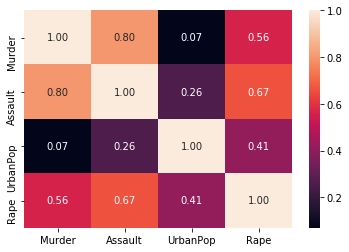

In [ ]:
sns.heatmap(crime.corr(),annot=True,fmt='.2f')

Assault and murder are highly correlated among others. Assault and rape are slightly correlated

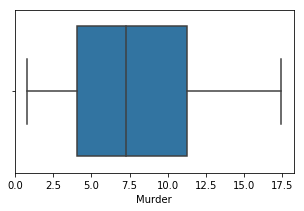

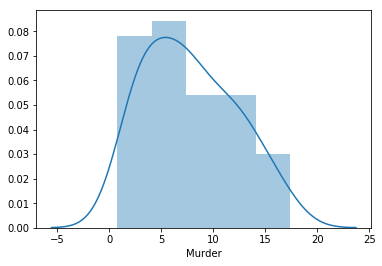

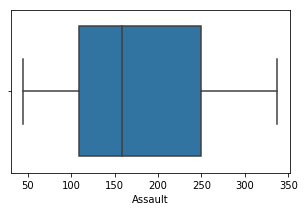

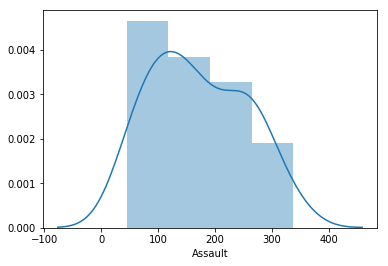

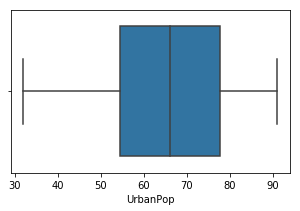

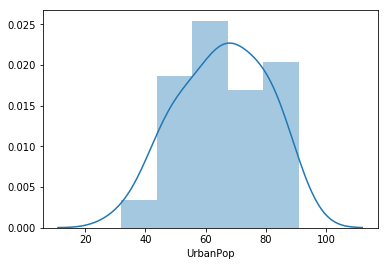

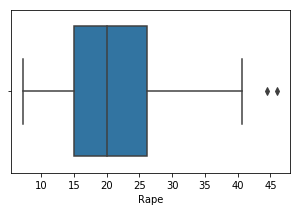

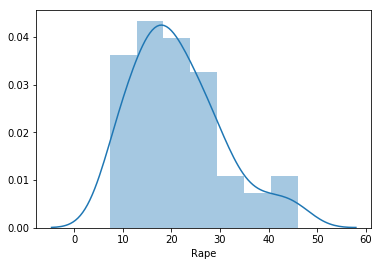

In [ ]:
for col in ["Murder","Assault","UrbanPop","Rape"]:
    plt.figure(figsize=(5,3))
    sns.boxplot(crime[col])
    plt.show()
    sns.distplot(crime[col])
    plt.show()


There are no outliers detected in any feature and our data is normally distributed

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
crime_norm = norm_func(crime.iloc[:,1:])
crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


####Hierarchial clustering

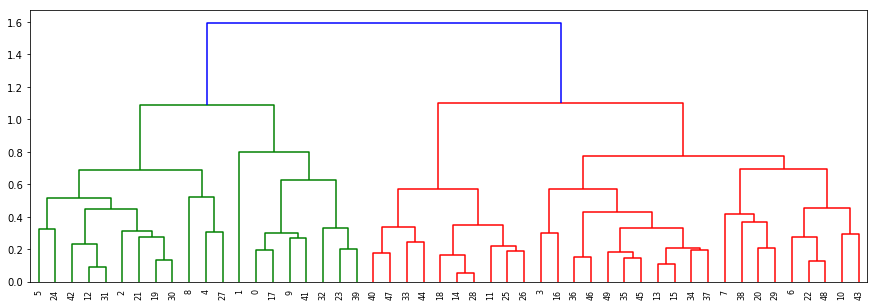

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 5))
dendrogram=sch.dendrogram(sch.linkage(crime_norm,method="complete"))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(crime_norm)

In [ ]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [ ]:
data=pd.concat([crime,Clusters],axis=1)
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


AttributeError: 'AxesSubplot' object has no attribute 'mean'

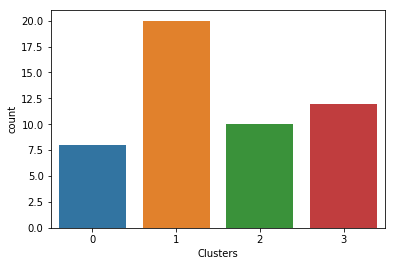

In [ ]:
sns.countplot(data["Clusters"])

In [ ]:
data.groupby(data.Clusters).mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Clusters,,,,,
0,14.087500,252.750000,53.500000,24.5375,0
1,5.715000,132.300000,70.800000,18.1000,1
2,3.180000,78.700000,49.300000,11.6300,2
3,10.883333,256.916667,78.333333,32.2500,3


Cluster 2 has lowest crime rates and also lowest population.

Whereas Cluster 0 has the very high crime rate compared to other clusters even with quite less population.

Some mandatory actions and precautions should be taken by the government in the places belonging to this cluster(Cluster-0) to mitigate the crime rates and bring peace.

###K-means clustering

C:\Users\PALLAVI\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


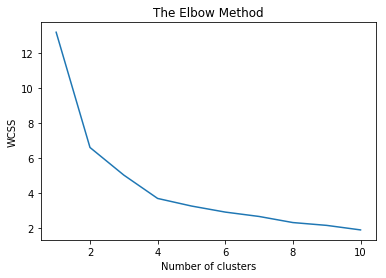

In [ ]:
#Elbow curve to find optimum clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_norm)

In [ ]:
data_2=pd.concat([crime,Clusters],axis=1)
data_2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


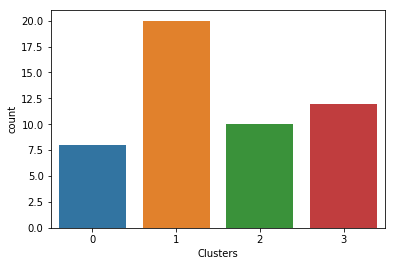

In [ ]:
sns.countplot(data_2["Clusters"])

In [ ]:
data_2.groupby(data_2.Clusters).mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Clusters,,,,,
0,14.087500,252.750000,53.500000,24.5375,0
1,5.715000,132.300000,70.800000,18.1000,1
2,3.180000,78.700000,49.300000,11.6300,2
3,10.883333,256.916667,78.333333,32.2500,3


k-means model also gives the same inference as hierarchial clustering. 

Clust 2 having lowest crime rates and Clust 0 the highest among all 4.

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=8)
nbrs=neigh.fit(crime_norm)
distances,indices=nbrs.kneighbors(crime_norm)

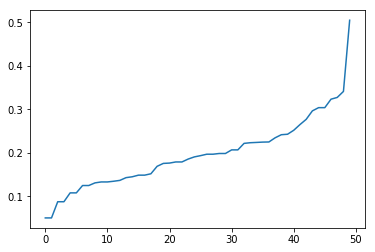

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

###DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=8)
dbscan.fit(crime_norm)

DBSCAN(eps=0.35, min_samples=8)

In [ ]:
dbscan.labels_


array([ 0, -1,  2,  0, -1,  1,  1,  1, -1,  0,  1,  1,  2,  1,  1,  1,  1,
        0,  1,  0,  1,  2,  1,  0,  1,  1,  1,  2,  1,  1,  2,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int32)

In [ ]:
Cluster=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [ ]:
data_3=pd.concat([crime,Cluster],axis=1)
data_3.head(2)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1


In [ ]:
data_3.Cluster.unique()

array([ 0, -1,  2,  1], dtype=int64)

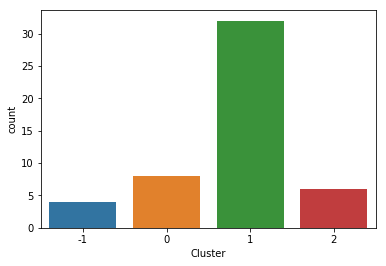

In [ ]:
sns.countplot(data_3["Cluster"])